In [ ]:
import pandas as pd #  DataFrame 형태로 데이터를 다룸
import numpy as np # 수치 계산을 위한 라이브러리
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
# sklearn.model_selection:머신러닝 모델의 학습과 평가를 도와주는 함수들이 모여 있는 곳
from sklearn.ensemble import RandomForestRegressor
# ensemble : 앙상블/ 여러 개의 머신러닝 모델을 결합해서 더 좋은 성능을 내는 기법
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
# mean_squared_error: 예측값과 실제값 사이의 평균 제곱 오차
# r2_score: 결정 계수 (예측의 설명력)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing 모듈은 머신러닝에서 데이터 전처리(Preprocessing) 를 도와주는 기능들이 모여 있는 곳
import seaborn as sns
import joblib
import streamlit as st

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format
# 데이터 로드
data = pd.read_csv('dataset/global_food_wastage_dataset.csv')
# 데이터 기본 정보 확인
data.info() # 데이터 타입, 결측치 확인
data.head()  # 데이터 샘플(상위 5개 행) 확인



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06


In [ ]:
# 결측치 확인/ 데이터프레임에서 각 열(Column)별 결측치 개수를 계산
data.isnull().sum()

Country                      0
Year                         0
Food Category                0
Total Waste (Tons)           0
Economic Loss (Million $)    0
Avg Waste per Capita (Kg)    0
Population (Million)         0
Household Waste (%)          0
dtype: int64

In [ ]:
# 모델 학습을 위해서 특성(X)과 타겟(y) 분리
# 올바른 방법: 여러 개의 컬럼을 리스트([])로 선택
X = data[['Total Waste (Tons)', 'Avg Waste per Capita (Kg)', 'Population (Million)', 'Household Waste (%)']] # 2D 배열 형태의 데이터프레임
y = data['Economic Loss (Million $)'] # 1D 배열 형태(시리즈, Series)

print(X.head())  # X 데이터 확인
print(y.head())  # y 데이터 확인



   Total Waste (Tons)  Avg Waste per Capita (Kg)  Population (Million)  \
0            19268.63                      72.69                 87.59   
1             3916.97                     192.52               1153.99   
2             9700.16                     166.94               1006.11   
3            46299.69                     120.19                953.05   
4            33096.57                     104.74               1105.47   

   Household Waste (%)  
0                53.64  
1                30.61  
2                48.08  
3                31.91  
4                36.06  
0   18686.68
1    4394.48
2    8909.16
3   40551.22
4   36980.82
Name: Economic Loss (Million $), dtype: float64


In [ ]:
# 데이터 전처리: 특성 스케일링
# 특성마다 단위와 값의 크기가 다르므로, 표준화가 필요
# 데이터 크기가 다를 경우, 스케일링을 적용하면 모델의 학습 속도가 빨라지고, 성능이 향상됨.
data.describe() # 기본적인 통계 정보를 확인/각 열(컬럼)의 평균(mean), 표준편차(std), 최소값(min), 최대값(max) 등을 확인
# 통계정보확인 후 차이가 보이므로 표준화 진행
scaler = StandardScaler() # 각 특성을 평균 0, 표준편차 1로 변환
X_scaled = scaler.fit_transform(X) # StandardScaler()로 변환한 데이터는 NumPy 배열 형태로 반환되므로 컬럼명이 사라짐, 다시 pandas DataFrame으로 변환합니다.
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) # columns=X.columns를 추가하여 원래 X의 컬럼명을 유지합니다.
# 변환된 데이터 확인
print(X_scaled.head())

   Total Waste (Tons)  Avg Waste per Capita (Kg)  Population (Million)  \
0               -0.41                      -0.71                 -1.54   
1               -1.48                       1.60                  1.11   
2               -1.08                       1.11                  0.74   
3                1.49                       0.21                  0.61   
4                0.56                      -0.09                  0.99   

   Household Waste (%)  
0                 0.31  
1                -1.68  
2                -0.17  
3                -1.57  
4                -1.21  


In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝을 위해 GridSearchCV 사용
param_grid = {
    'n_estimators': [50, 100, 200],  # 트리의 개수
    'max_depth': [4, 6, 8],       # 트리의 최대 깊이
    'min_samples_split': [2, 4],  # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2]    # 리프 노드에 있어야 하는 최소 샘플 수
}
# estimators : 의사결정 트리 개수 지정 / 여러 개의 트리를 만들어서 그 평균 결과로 예측 수행

In [18]:
rf_model = RandomForestRegressor(random_state=42)  # Random Forest 모델 초기화
# GridSearchCV는 하이퍼파라미터 최적화(튜닝)를 위한 도구.
# 주어진 하이퍼파라미터(param_grid) 조합을 모두 테스트하여 가장 성능이 좋은 모델을 선택.
# **교차 검증(Cross Validation, CV)**을 사용하여 모델이 과적합되지 않도록 평가.
# estimator=rf_model	평가할 모델 (랜덤 포레스트)
# param_grid=param_grid	실험할 하이퍼파라미터 조합
# cv=3	3-Fold 교차 검증 수행
# scoring='r2'	모델 평가 기준 → 결정계수(R², R-squared) 사용
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='r2')


In [19]:
# 모든 하이퍼파라미터 조합을 하나씩 적용하여 모델 학습
# 가장 높은 R² Score(성능)를 기록한 모델을 best_estimator_로 저장
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [20]:
# 최적의 파라미터 출력
print("Best Parameters:", grid_search.best_params_)
# GridSearchCV에서 최적의 하이퍼파라미터를 찾은 후, 가장 성능이 좋은 랜덤 포레스트 모델을 저장
best_rf_model = grid_search.best_estimator_
# 모델 저장
joblib.dump(best_rf_model, 'food_wastage_model.pkl')
# 테스트 데이터로 예측 (하이퍼 파라미터 튜닝을 통해 최적회된 상태로 예측이 이루어짐)
y_pred = best_rf_model.predict(X_test)

Best Parameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [21]:

# 모델 로딩을 캐싱하여 성능 최적화
@st.cache_resource
def load_model():
    return joblib.load("food_wastage_model.pkl")

model = load_model()
@st.cache_data
def predict_economic_loss(TotalWaste, AvgWasteperCapita, HouseholdWaste, Population):
    input_data = np.array([[TotalWaste, AvgWasteperCapita, HouseholdWaste, Population]])
    prediction = model.predict(input_data)[0]
    return prediction

2025-03-19 10:46:33.821 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.062 
  command:

    streamlit run c:\test\.venv\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-19 10:46:34.064 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.066 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.223 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.224 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.226 No runtime found, using MemoryCacheStorageManager


In [22]:

# 3. Streamlit 앱
st.title('식량 폐기로 인한 경제적 손실 예측 시스템')
st.write('Total Waste (Tons),Avg Waste per Capita, Household Waste, Population 값을 입력하여 경제적 손실을 예측을 해보세요.')

2025-03-19 10:46:34.251 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.253 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.256 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.258 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.260 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.261 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [23]:

# 사용자 입력 받기 (조정된 범위 설정)
TotalWaste = st.slider(
    'Total Waste (Tons) (총 폐기물량)', 
    min_value=1000, max_value=50000, value=20000, step=1000
)

AvgWasteperCapita = st.slider(
    'Avg Waste per Capita (Kg) (1인당 평균 폐기물량)', 
    min_value=50.0, max_value=200.0, value=100.0, step=0.5
)

HouseholdWaste = st.slider(
    'Household Waste (%) (가정에서 발생하는 폐기물 비율)', 
    min_value=10, max_value=60, value=30, step=1
)

Population = st.slider(
    'Population (Million) (인구수)', 
    min_value=50, max_value=1200, value=500, step=50
)

2025-03-19 10:46:34.297 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.302 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.304 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.307 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.308 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.310 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.310 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.311 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [24]:

# 예측 버튼
if st.button('예측하기'):
    prediction = predict_economic_loss(TotalWaste, AvgWasteperCapita, HouseholdWaste, Population)
    st.success(f'📌 예상 경제적 손실: {prediction:,.2f} (Million $)')

    

2025-03-19 10:46:34.358 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.359 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.361 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.361 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 10:46:34.362 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


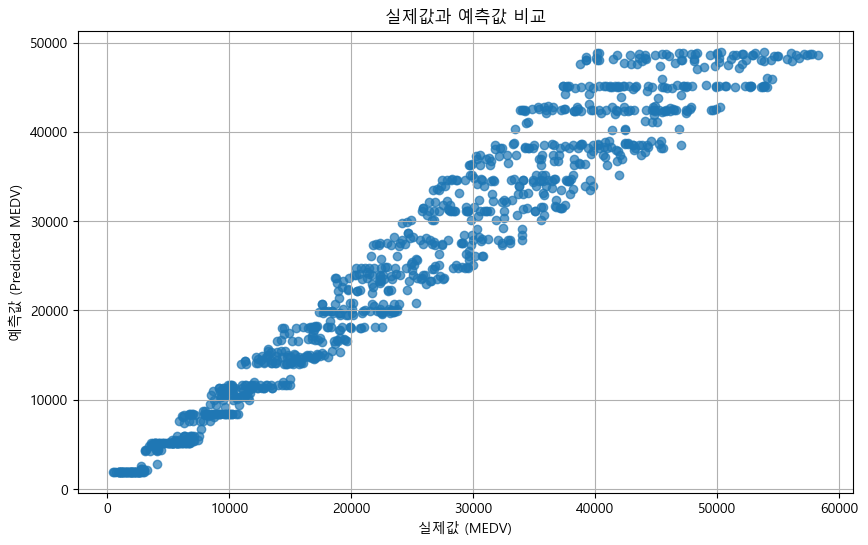

In [25]:

# 결과 시각화 산점도 그래프
# **랜덤 포레스트 회귀 모델의 실제값(y_test)과 예측값(y_pred)을 비교
# 모델이 얼마나 정확하게 예측했는지를 시각적으로 확인
# 하나의 점 = 한 개의 데이터 샘플
# 점이 y=x(45도 대각선)에 가까울수록, 모델의 예측이 정확한 것.
# 점들이 45도 대각선에 가까울수록 모델의 성능이 좋음!
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('실제값 (MEDV)')
plt.ylabel('예측값 (Predicted MEDV)')
plt.title('실제값과 예측값 비교')
plt.grid()
plt.show()

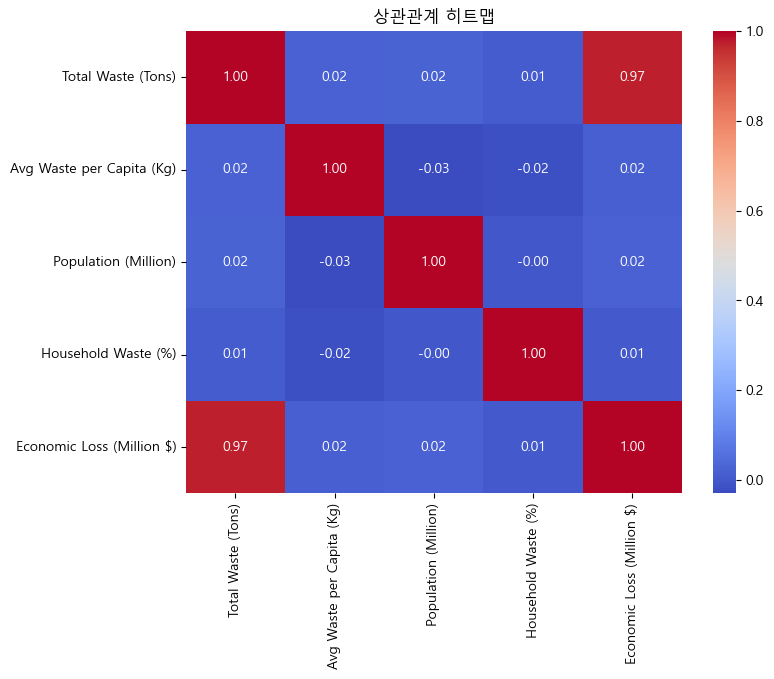

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# 특정 컬럼만 선택
selected_columns = ['Total Waste (Tons)', 'Avg Waste per Capita (Kg)', 'Population (Million)', 'Household Waste (%)', 'Economic Loss (Million $)']
selected_data = data[selected_columns]  # 선택한 컬럼만 추출

# 데이터 상관관계 히트맵 
# 데이터의 상관관계를 분석
# 변수 간의 상관관계(Correlation)를 숫자로만 보는 것보다 시각적으로 확인
# 어떤 변수가 서로 강한 관계(양의 상관관계 또는 음의 상관관계)를 가지는지 한눈에 파악
# 상관관계가 낮거나 없는 변수는 모델 성능에 큰 영향을 주지 않음 → 변수 선택에 도움.
# 높은 상관관계를 가진 변수는 제거하면 모델의 성능 향상 
plt.figure(figsize=(8, 6))
sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('상관관계 히트맵')
plt.show()


In [28]:
# 특성 중요도 계산
feature_importance = pd.DataFrame({
    '특성': X.columns,
    '중요도': best_rf_model.feature_importances_
}).sort_values('중요도', ascending=False)

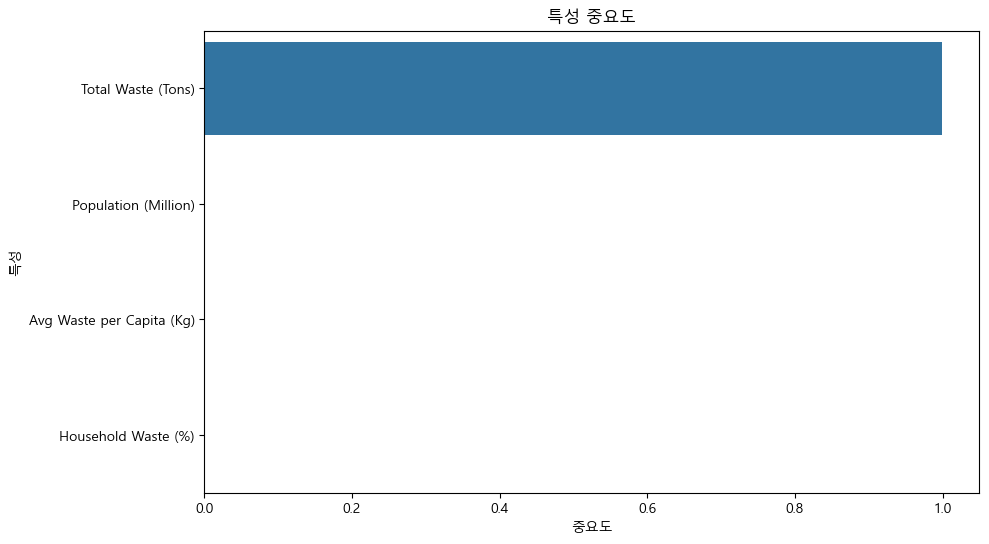

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='중요도', y='특성', data=feature_importance)
plt.title('특성 중요도')
plt.show()

In [ ]:
# 교차 검증 수행 모델의 성능을 평가
# 	여러 번 나눔 → 평균적인 성능
# 전체 데이터를 고르게 평가
# 느리지만 더 정확하고 신뢰 가능
cv_scores = cross_val_score(best_rf_model, X_scaled, y, cv=5)
print(f"각 폴드별 점수: {cv_scores}")
print(f"평균 점수: {cv_scores.mean():.4f}") #모델의 평균 성능이 약 94%
print(f"점수 표준편차: {cv_scores.std():.4f}") # 점수 표준편차(std())가 작을수록, 모델의 성능이 안정적

각 폴드별 점수: [0.94769479 0.94833079 0.94756988 0.95011639 0.94724028]
평균 점수: 0.9482
점수 표준편차: 0.0010


In [ ]:
# 랜덤 포레스트 평가/평가 지표로 평균 제곱 오차(MSE)와 결정 계수(R²)로 예측 성능을 확인
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)
print(f"랜덤 포레스트 - MSE: {rf_mse:.2f}, R2: {rf_r2:.2f}") # 이 모델은 95%의 설명력을 가지며, 예측 오류(MSE)도 작음

랜덤 포레스트 - MSE: 11551551.63, R2: 0.95


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import joblib
import streamlit as st
# 2. 다른 모델 비교
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}")

Linear Regression - MSE: 11118318.41, R2: 0.95
Decision Tree - MSE: 20161510.19, R2: 0.91


In [ ]:
# 3. 최적 모델 선택 및 시각화
results["Random Forest"] = {"MSE": rf_mse, "R2": rf_r2}
best_model = max(results, key=lambda x: results[x]['R2']) # R²가 높은 모델이 베스트 모델
print("\n최적 모델:", best_model)


최적 모델: Linear Regression


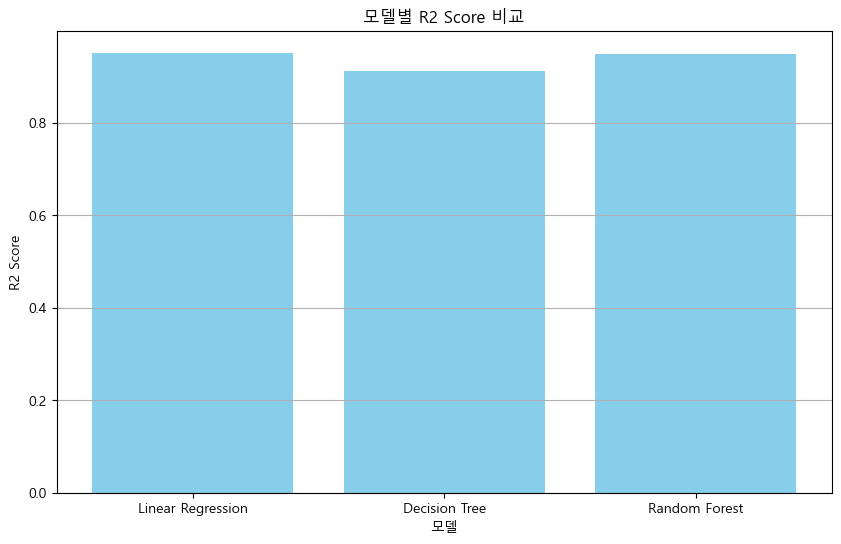

In [ ]:
# 결과 시각화
r2_scores = [result["R2"] for result in results.values()]
model_names = list(results.keys())
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel("모델")
plt.ylabel("R2 Score")
plt.title("모델별 R2 Score 비교")
plt.grid(axis='y')
plt.show()

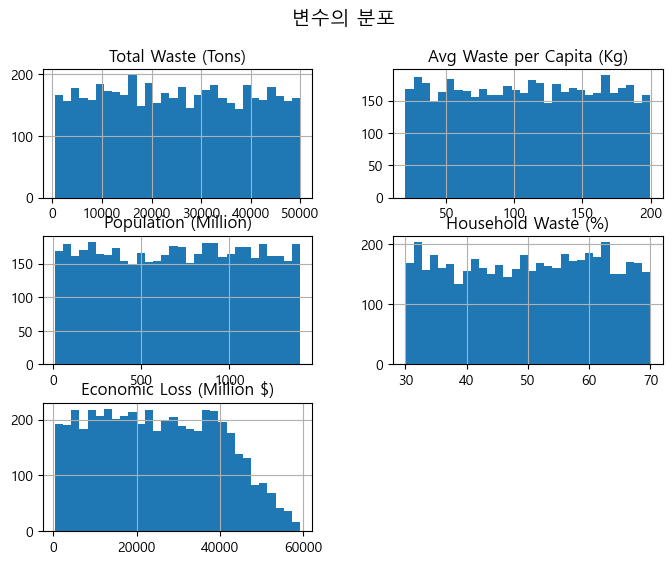

In [34]:
# 각 변수의 분포 확인하는 히스토그램
# 각 변수의 분포(Distribution)를 시각적으로 확인(정규 분포인지, 왜곡되었는지 등)
selected_columns = ['Total Waste (Tons)', 'Avg Waste per Capita (Kg)', 'Population (Million)', 'Household Waste (%)','Economic Loss (Million $)']
data[selected_columns].hist(figsize=(8, 6), bins=30)

# 그래프 출력
plt.suptitle("변수의 분포", fontsize=14)
plt.show()

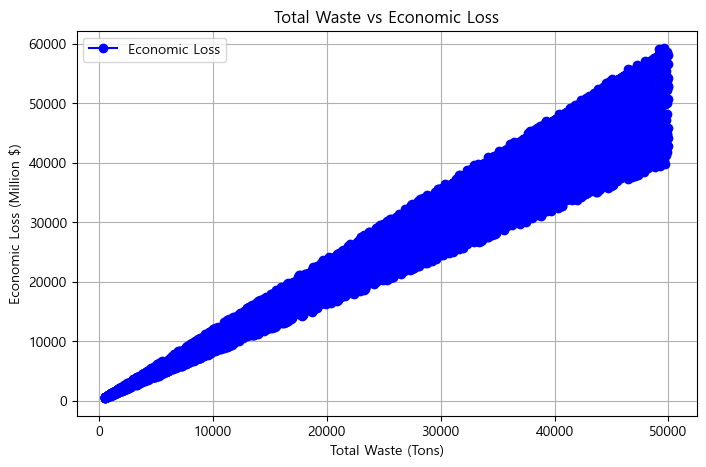

In [35]:
# "총 폐기물량(Total Waste (Tons))"과 "경제적 손실(Economic Loss (Million $))" 사이의 관계를 시각적으로 보여주는 그래프
# 폐기물량(Total Waste (Tons))이 증가할수록 경제적 손실(Economic Loss)이 어떻게 변하는지 확인
# X의 특정 변수를 x축으로 설정 (예: 총 폐기물량)
x_axis = X['Total Waste (Tons)']

# 선 그래프
plt.figure(figsize=(8, 5))
plt.plot(x_axis, y, marker='o', linestyle='-', color='b', label='Economic Loss')

# 그래프 스타일 설정
plt.xlabel('Total Waste (Tons)')  # X축 라벨
plt.ylabel('Economic Loss (Million $)')  # Y축 라벨
plt.title('Total Waste vs Economic Loss')  # 그래프 제목
plt.legend()
plt.grid(True)  # 격자 표시
plt.show()

In [36]:
from ydata_profiling import ProfileReport
# YData Profiling으로 데이터 프로파일링 보고서 생성
profile = ProfileReport(data, title="global_food_wastage Profiling Report", explorative=True)

# 보고서를 HTML 파일로 저장
output_file = 'report/global_food_wastage_profiling_report.html'
profile.to_file(output_file)
print(f"프로파일링 보고서가 생성되었습니다: {output_file}")

c:\test\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 99.95it/s]

프로파일링 보고서가 생성되었습니다: report/global_food_wastage_profiling_report.html
